<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.0 Import libraries
import keras
keras.__version__
import numpy as np

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [3]:
# 1.1
!pip install kaggle
! ls -la /content

total 20
drwxr-xr-x 1 root root 4096 Feb 24 13:42 .
drwxr-xr-x 1 root root 4096 Feb 24 13:41 ..
drwxr-xr-x 1 root root 4096 Feb 22 14:38 .config
-rw-r--r-- 1 root root   67 Feb 24 13:42 kaggle.json
drwxr-xr-x 1 root root 4096 Feb 22 14:38 sample_data


In [5]:
! rm -rf /content/flowers
! rm -rf $HOME/.kaggle

In [6]:
# 1.2 Next upload the downloaded Kaggle's json file
#     to Colab

from google.colab import files

# 1.3 This command will create a Browse button
#      to browse and select a file from your machine
uploaded = files.upload()

# 1.4 Get details of uploaded files
#     File get uploaded to /content folder

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle (1).json
User uploaded file "kaggle.json" with length 67 bytes


In [7]:
# 2.0 Secure your kaggle.json file
!mkdir $HOME/.kaggle

In [8]:
# 2.1
!mv kaggle.json $HOME/.kaggle/kaggle.json
!chmod 600 $HOME/.kaggle/kaggle.json

In [9]:
# Before unzipping
#  delete any existing folders
! rm -rf /content/data
! rm -rf /content/flowers

In [10]:
# 2.2 Download data from Kaggle
! kaggle datasets download -d alxmamaev/flowers-recognition

 95% 427M/450M [00:04<00:00, 74.9MB/s]
100% 450M/450M [00:04<00:00, 94.5MB/s]


In [11]:
# 2.3 Unzip in /content folder
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: flowers/flowers/rose/110472418_87b6a3aa98_m.jpg  
  inflating: flowers/flowers/rose/11102341464_508d558dfc_n.jpg  
  inflating: flowers/flowers/rose/11233672494_d8bf0a3dbf_n.jpg  
  inflating: flowers/flowers/rose/11694025703_9a906fedc1_n.jpg  
  inflating: flowers/flowers/rose/118974357_0faa23cce9_n.jpg  
  inflating: flowers/flowers/rose/11944957684_2cc806276e.jpg  
  inflating: flowers/flowers/rose/12165480946_c4a3fe182d_n.jpg  
  inflating: flowers/flowers/rose/12202373204_34fb07205b.jpg  
  inflating: flowers/flowers/rose/12238827553_cf427bfd51_n.jpg  
  inflating: flowers/flowers/rose/12240165555_98625b1e88_n.jpg  
  inflating: flowers/flowers/rose/12240303_80d87f77a3_n.jpg  
  inflating: flowers/flowers/rose/12240577184_b0de0e53ea_n.jpg  
  inflating: flowers/flowers/rose/12243068283_ee4c2683e2_n.jpg  
  inflating: flowers/flowers/rose/12243069253_e512464095_n.jpg  
  inflating: flowers/flowers/rose/123128873_546b8b

In [12]:
# Check unzipped files
# Should be: daisy  dandelion  flowers  rose  sunflower  tulip
! ls /content/flowers/

daisy  dandelion  flowers  rose  sunflower  tulip


In [13]:
# Create train/test folders
!mkdir -p /content/data/train
!mkdir -p /content/data/validation

In [14]:
# Move folders/files
! mv /content/flowers/flowers/*  /content/data/validation
! rm -rf /content/flowers/flowers
!  mv /content/flowers/*  /content/data/train

In [15]:
# Check
! ls /content/data/validation
! ls /content/data/train

daisy  dandelion  rose	sunflower  tulip
daisy  dandelion  rose	sunflower  tulip


In [16]:
# Get number of image files in various folders
#  one-by-one
# https://stackoverflow.com/a/8311376/3282777

path, dirs, files = next(os.walk("/content/data/train/daisy"))
file_count = len(files)
file_count

769

In [ ]:
# "/content/flowers/daisy" :      769
# "/content/flowers/dandelion" : 1055
# "/content/flowers/rose"  :      784
# "/content/flowers/sunflower" :  734
# "/content/flowers/tulip":       984
# Same as above under: /content/flowers/flowers/

In [17]:
# folders:
daisy_folder = "/content/data/train/daisy"
dandelion_folder = "/content/data/train/dandelion"
rose_folder = "/content/data/train/rose" 
sunflower_folder = "/content/data/train/sunflower"
tulip_folder = "/content/data/train/tulip"

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [19]:
folders = [daisy_folder,dandelion_folder,rose_folder,sunflower_folder,tulip_folder]

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images   

In [20]:
# Read all images from disk
all_images = [ load_images_from_folder(i)   for i in folders ]

In [21]:
daisy = all_images[0]
dandelion = all_images[1]
rose = all_images[2]
sunflower = all_images[3]
tulip = all_images[4]

In [22]:
daisy[0].shape
dandelion[0].shape
rose[0].shape
sunflower[0].shape
tulip[0].shape

(180, 240, 3)

(240, 320, 3)

(213, 320, 3)

(282, 320, 3)

(134, 240, 3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


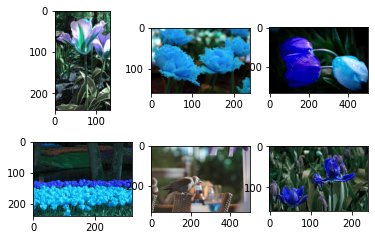

In [23]:
flower = np.random.choice([daisy,dandelion,rose,sunflower,tulip ])
fig = plt.figure()
sample = np.random.choice(range(len(flower)), size  = 6)
j = 0
for i in sample:
  j += 1
  ax = fig.add_subplot(2,3,j)
  abc =imshow(flower[i])
  if j > 6:
    break

In [24]:
# 1.1
import tensorflow as tf
import pandas as pd
#import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.applications import MobileNet as mb
from tensorflow.keras.models import Sequential


In [25]:
img_width, img_ht = 224,224
batch_size = 32


In [26]:
model = tf.keras.applications.MobileNet(
                                        input_shape=(img_width, img_ht,3),
                                        alpha=1.0,
                                        depth_multiplier=1,
                                        dropout=0.001,
                                        include_top=True,
                                        weights='imagenet',
                                        input_tensor=None,
                                        pooling=None,
                                        classes=1000,
                                        classifier_activation='softmax'
                                        )


17227776/17225924 [==============================] - 0s 0us/step


In [27]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [28]:
vector = model.get_layer("reshape_2").output
feature_extractor = tf.keras.Model(model.input, vector)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
datagen = ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             horizontal_flip=True)
                             
    


In [35]:
valid_datagen = ImageDataGenerator(featurewise_center=False,
                             featurewise_std_normalization=False,
                             horizontal_flip=True)

In [37]:
xx = datagen.flow_from_directory("/content/data/train", target_size=(224,224))
vv = valid_datagen.flow_from_directory("/content/data/validation", target_size=(224,224)) 

Found 4323 images belonging to 5 classes.
Found 4323 images belonging to 5 classes.


In [32]:
s_model=Sequential()
s_model.add(feature_extractor)
s_model.add(Dense(1024, activation='relu'))
s_model.add(Dense(5, activation='softmax'))

In [33]:
s_model.compile(loss = "categorical_crossentropy", metrics = "accuracy")

In [34]:
s_model.fit_generator(xx,epochs = 5)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
136/136 [==============================] - 30s 149ms/step - loss: 3.4014 - accuracy: 0.6660
Epoch 2/5
136/136 [==============================] - 20s 148ms/step - loss: 0.6247 - accuracy: 0.7891
Epoch 3/5
136/136 [==============================] - 20s 149ms/step - loss: 0.4574 - accuracy: 0.8499
Epoch 4/5
136/136 [==============================] - 20s 148ms/step - loss: 0.3723 - accuracy: 0.8791
Epoch 5/5
136/136 [==============================] - 20s 149ms/step - loss: 0.3571 - accuracy: 0.8875
